In [1]:
import time
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import networkx as nx

In [2]:
X = pd.read_csv('clean_data')

In [3]:
X.drop(columns=['Unnamed: 0'],inplace=True)
X

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,satisfaction
0,1,0,40,1,2,534,3,5,3,3,...,5,5,5,5,5,4,5,3,3,1
1,0,0,49,0,0,383,4,4,4,1,...,2,2,3,2,4,4,5,2,0,0
2,1,0,19,0,0,550,2,3,2,4,...,1,1,4,4,4,1,3,1,35,0
3,0,0,15,0,0,1127,3,5,3,3,...,2,2,4,4,4,5,4,2,14,0
4,1,0,51,0,0,226,2,3,0,3,...,2,2,2,0,3,2,2,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,0,16,0,0,967,2,4,2,4,...,4,4,3,4,4,4,5,4,0,0
5996,1,0,68,0,0,913,1,5,1,3,...,5,1,1,1,1,3,1,2,13,0
5997,1,0,50,0,0,1999,1,5,1,2,...,5,5,5,1,5,4,5,5,26,0
5998,0,0,30,1,2,946,4,4,4,4,...,4,4,4,5,5,4,5,4,0,1


In [4]:
A = np.loadtxt('adjacency_matrix.csv',delimiter=',')

In [6]:
G = nx.from_numpy_matrix(A)

In [7]:
nx.is_connected(G)

True

In [27]:
#nx.draw(G,node_size=20)

In [8]:
features = pd.Series(X.satisfaction) 

In [9]:
color_map = []
for i in features.items():
    if i[1] == 0:
        color_map.append('red')
    else:
        color_map.append('blue')

In [10]:
pos = nx.spring_layout(G)

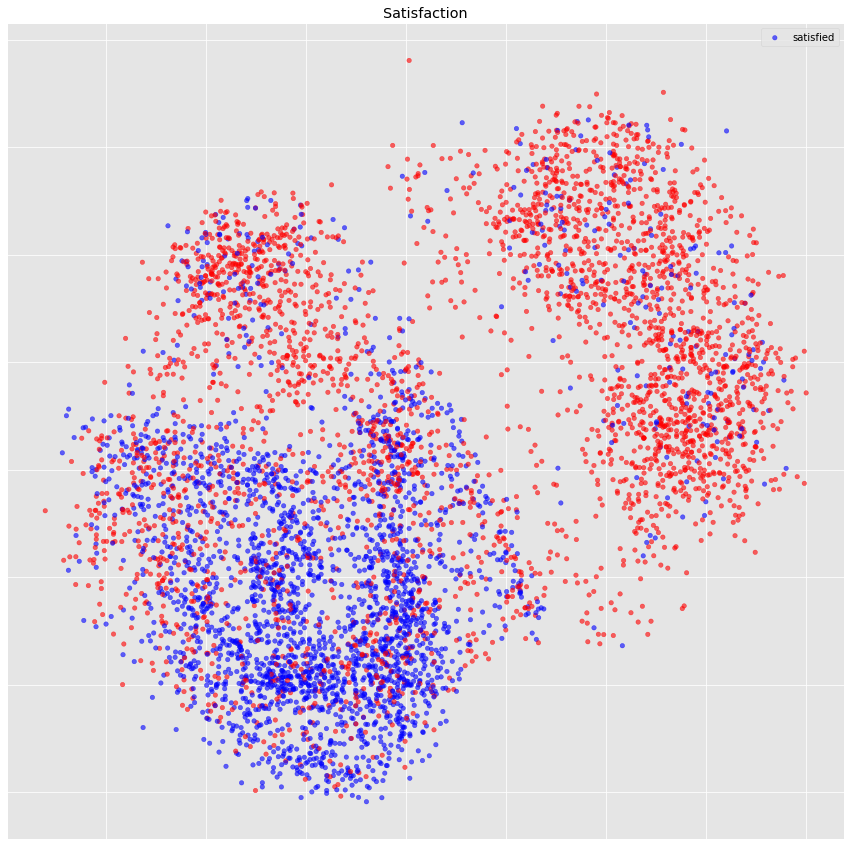

In [11]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend(['satisfied' ,'dissatisfied or neutral'])
plt.title('Satisfaction')
plt.show()

<AxesSubplot:>

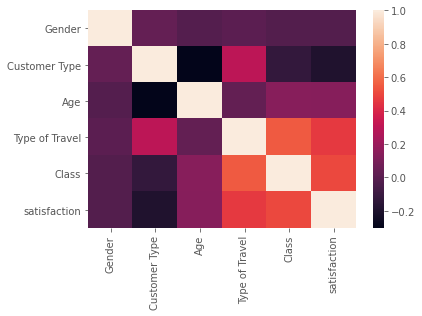

In [13]:
import seaborn as sns
cormap_vars = X[['Gender','Customer Type','Age','Type of Travel','Class','satisfaction']]
cormap = cormap_vars.corr()
sns.heatmap(cormap)

In [14]:
colmapvar = pd.Series(X['Gender']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


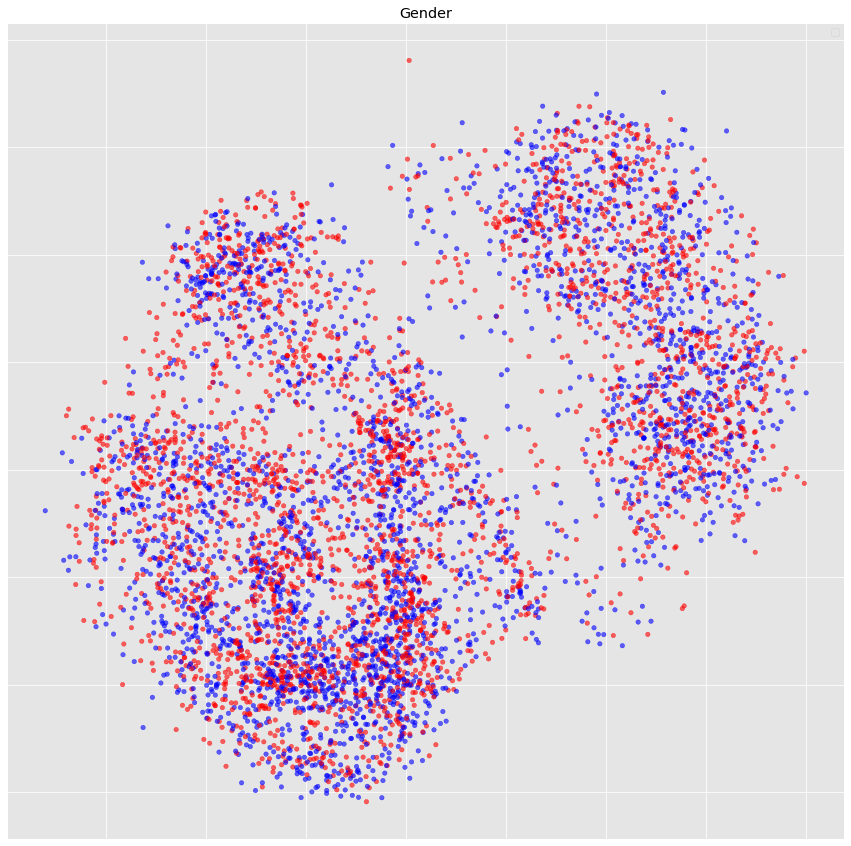

In [15]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Gender')
plt.show()

In [16]:
colmapvar = pd.Series(X['Customer Type']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')

No handles with labels found to put in legend.


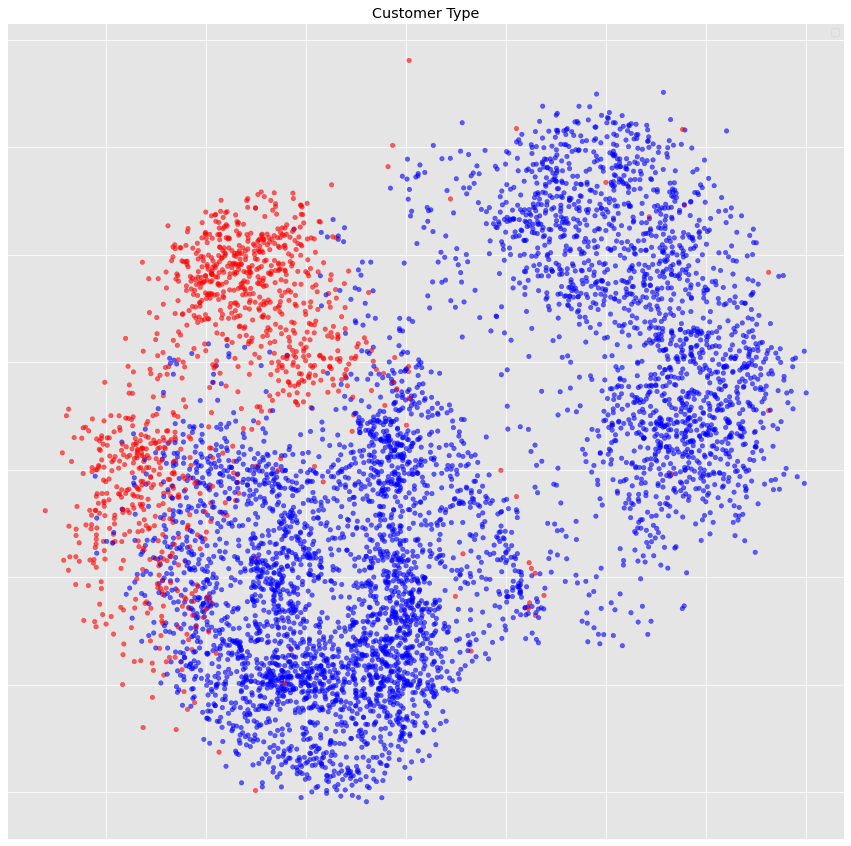

In [17]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Customer Type')
plt.show()

In [18]:
colmapvar = pd.Series(X['Class']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    else:
        color_map.append('green')

No handles with labels found to put in legend.


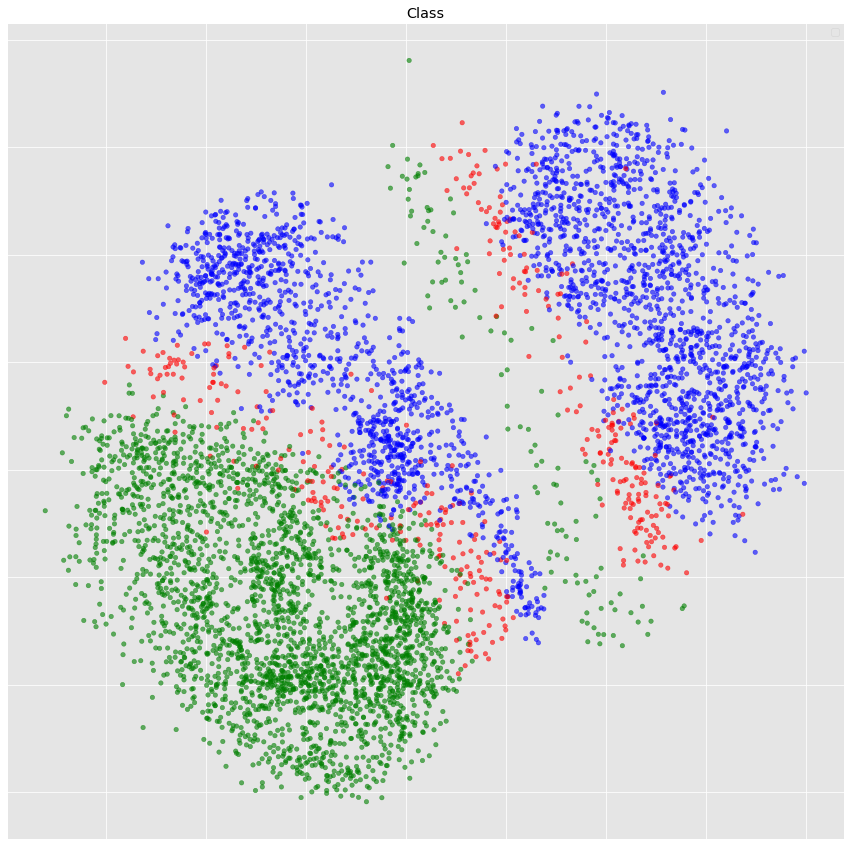

In [19]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Class')
plt.show()

In [20]:
colmapvar = pd.Series(X['Type of Travel']) 
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    else:
        color_map.append('red')


No handles with labels found to put in legend.


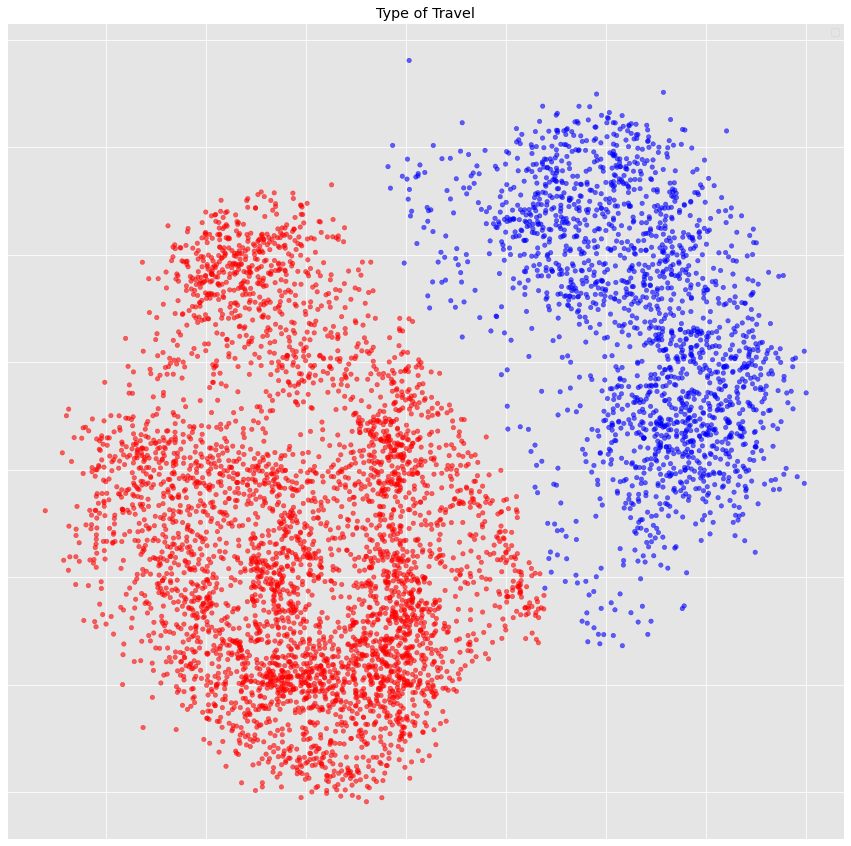

In [21]:
plt.figure(figsize=(15,15))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Type of Travel')
plt.show()

In [29]:
colmapvar = pd.Series(X['Age']) 
colmapvar = colmapvar.apply(lambda x: 0 if x < 26 else(1 if x < 39 else(2 if x < 50 else 3)))
color_map = []
for i in colmapvar.items():
    if i[1] == 0:
        color_map.append('blue')
    elif i[1] == 1:
        color_map.append('red')
    elif i[1] == 2:
        color_map.append('green')
    elif i[1] == 3:
        color_map.append('brown')
    else:
        color_map.append('purple')

No handles with labels found to put in legend.


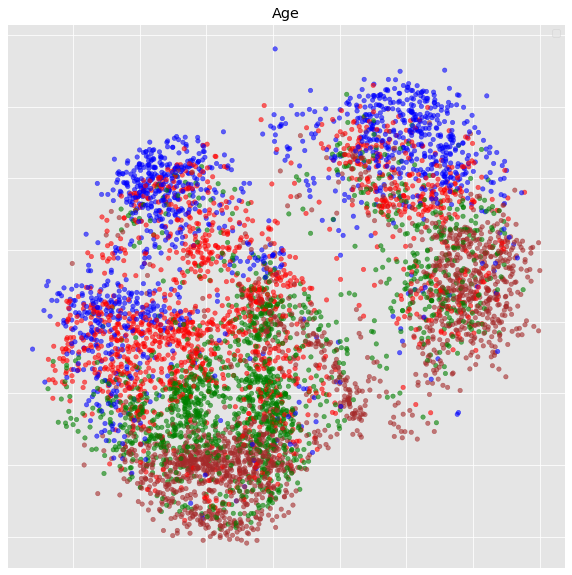

In [32]:
plt.figure(figsize=(10,10))
nx.draw_networkx_nodes(G,pos,node_size=20,node_color=color_map, alpha=0.6)
plt.legend()
plt.title('Age')
plt.show()

In [72]:
# node2vec
t = pd.read_csv('embeddings', delimiter = " ", index_col=0, header = None)
t.sort_index(inplace=True)
t = t.to_numpy()
t.shape

(6000, 2)

In [73]:
Z = pd.DataFrame(t,columns = ['x1','x2'])
Z['features'] = features

In [74]:
import statsmodels.api as sm
P = sm.add_constant(t) 
log_reg = sm.Logit(features, P).fit()

Optimization terminated successfully.
         Current function value: 0.511967
         Iterations 6


In [75]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 6000
Model:                          Logit   Df Residuals:                     5997
Method:                           MLE   Df Model:                            2
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.2550
Time:                        18:54:37   Log-Likelihood:                -3071.8
converged:                       True   LL-Null:                       -4122.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.6431      0.361    -10.089      0.000      -4.351      -2.935
x1             3.2748      0.355      9.220      0.000       2.579       3.971
x2            -0.9065      0.027    -33.039      0.0

In [76]:
predictions = log_reg.predict(P) 

yhat_log = np.empty((len(predictions),1))

for i in range(len(predictions)):
    if predictions[i] < 0.5:
        yhat_log[i] = 0
    else:         
        yhat_log[i] = 1

In [77]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(Z,features, test_size = 0.7, shuffle=True)

In [78]:
print('Classification Accuracy validation set {}'.format(accuracy_score(features,yhat_log)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(features,yhat_log))

Classification Accuracy validation set 0.77
-------------------------------------------------------------
Confusion Matrix validation set:
[[2542  786]
 [ 594 2078]]


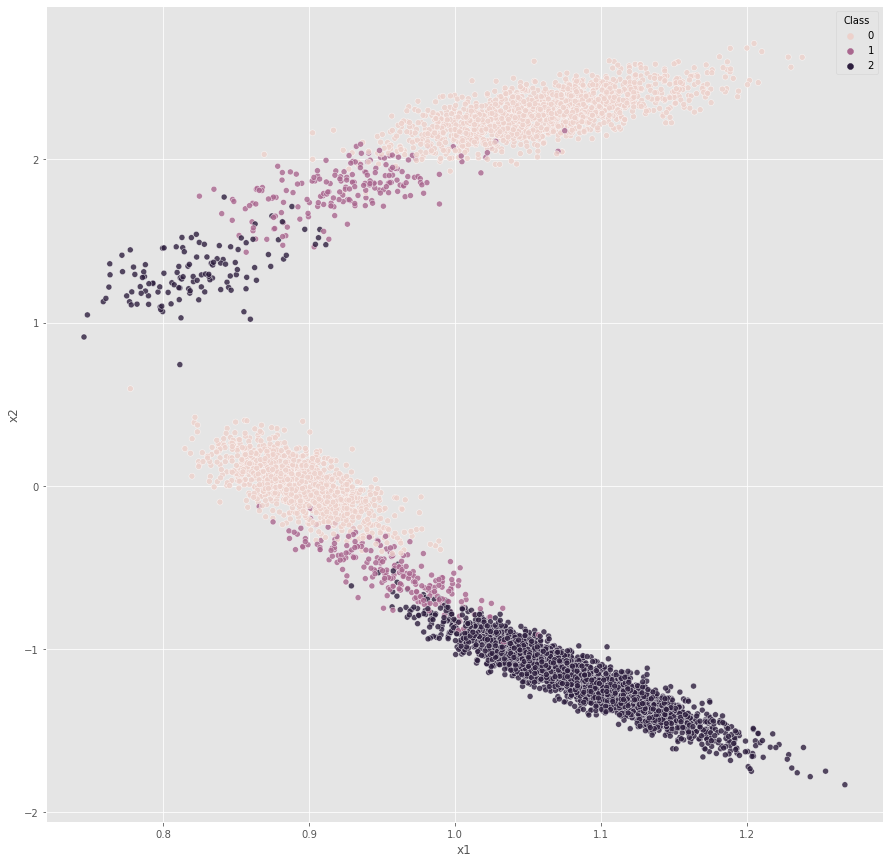

In [80]:
import seaborn as sns
plt.figure(figsize=(15,15))
sns.scatterplot(x=Z.x1,y=Z.x2,hue=X['Class'],alpha=0.8)
plt.show()

In [34]:
import dgl
import dgl.nn as dglnn
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.preprocessing import StandardScaler

G_dgl = dgl.from_networkx(G)
feat = X.drop(columns=['satisfaction'])
feat = pd.get_dummies(feat)
scale = StandardScaler()
feat = pd.DataFrame(scale.fit_transform(feat))

embedding = nn.Parameter(torch.tensor(feat.values,dtype=torch.float))

# embed = nn.Embedding(102, 5)  # 34 nodes with embedding dim equal to 5
G_dgl.ndata['feat'] =  embedding
G_dgl.ndata['train_mask'] = torch.zeros(len(G_dgl.nodes()), dtype=torch.bool).bernoulli(0.3)
G_dgl.ndata['label'] = torch.tensor(features)

In [35]:
G_dgl.ndata['val_mask'] = torch.empty(len(G_dgl.nodes()))
for i in range(len(G_dgl.ndata['train_mask'])):
    if G_dgl.ndata['train_mask'][i] == True:
        G_dgl.ndata['val_mask'][i] = False
    else:
        G_dgl.ndata['val_mask'][i] = True

G_dgl.ndata['val_mask'] = G_dgl.ndata['val_mask'].type(torch.bool)

In [36]:
# Contruct a two-layer GNN model

class SAGE(nn.Module):
    def __init__(self, in_feats, hid_feats_1, hid_feats_2, hid_feats_3, out_feats):
        super().__init__()
        self.conv1 = dglnn.pytorch.conv.SAGEConv(
            in_feats=in_feats, out_feats=hid_feats_1, aggregator_type='mean', feat_drop=0.1)
        
        self.conv2 = dglnn.pytorch.conv.SAGEConv(
            in_feats=hid_feats_1, out_feats=hid_feats_2, aggregator_type='mean', feat_drop=0.1)
        
        self.conv3 = dglnn.pytorch.conv.SAGEConv(
            in_feats=hid_feats_2, out_feats=out_feats, aggregator_type='mean', feat_drop=0.1)
        
#        self.conv4 = dglnn.pytorch.conv.SAGEConv(
#            in_feats=hid_feats_3, out_feats=out_feats, aggregator_type='mean')

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.normalize(h, p=2, dim=1)
        h = F.relu(h)
        h = self.conv2(graph, h)
        h = F.normalize(h, p=2, dim=1)
        h = F.relu(h)
        h = self.conv3(graph, h)
#        h = F.normalize(h, p=2, dim=1)
#        h = F.relu(h)
#        h = self.conv4(graph,h)
        h = F.normalize(h, p=2, dim=1)
        h = F.log_softmax(h,dim=1)
        return h

In [37]:
def evaluate(model, graph, features, labels, mask):
    model.eval()
    with torch.no_grad():
        logits = model(graph, features)
        logits = logits[mask]
        labels = labels[mask]
        _, indices = torch.max(logits, dim=1)
        correct = torch.sum(indices == labels)
        return correct.item() * 1.0 / len(labels)

In [38]:
node_features = G_dgl.ndata['feat']
node_labels = G_dgl.ndata['label']
train_mask = G_dgl.ndata['train_mask']
valid_mask = G_dgl.ndata['val_mask']
n_features = node_features.shape[1]
n_labels = int(node_labels.max().item() + 1)

In [39]:

model = SAGE(in_feats=n_features, hid_feats_1=120, hid_feats_2 = 100, hid_feats_3=40, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
dur = []
for epoch in range(200):
    t0 = time.time()
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    dur.append(time.time() - t0)
    
    if epoch % 1 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}, Time: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val,np.mean(dur)))


Epoch: 0, train loss: 0.8506, validation loss: 0.8597, training accuracy: 0.4773, validation accuracy: 0.4890, Time: 2.4582
Epoch: 1, train loss: 0.7347, validation loss: 0.7456, training accuracy: 0.6017, validation accuracy: 0.5979, Time: 2.6858
Epoch: 2, train loss: 0.6501, validation loss: 0.6733, training accuracy: 0.6824, validation accuracy: 0.6776, Time: 3.0765
Epoch: 3, train loss: 0.5892, validation loss: 0.6123, training accuracy: 0.7406, validation accuracy: 0.7421, Time: 2.9440
Epoch: 4, train loss: 0.5613, validation loss: 0.5639, training accuracy: 0.7776, validation accuracy: 0.7760, Time: 2.6775
Epoch: 5, train loss: 0.5277, validation loss: 0.5316, training accuracy: 0.7983, validation accuracy: 0.7912, Time: 2.4942
Epoch: 6, train loss: 0.5095, validation loss: 0.5064, training accuracy: 0.8056, validation accuracy: 0.7995, Time: 2.3924
Epoch: 7, train loss: 0.4745, validation loss: 0.4924, training accuracy: 0.8185, validation accuracy: 0.8114, Time: 2.3307
Epoch: 8

Epoch: 66, train loss: 0.3608, validation loss: 0.3887, training accuracy: 0.9154, validation accuracy: 0.8842, Time: 2.1056
Epoch: 67, train loss: 0.3625, validation loss: 0.3886, training accuracy: 0.9137, validation accuracy: 0.8816, Time: 2.1046
Epoch: 68, train loss: 0.3575, validation loss: 0.3882, training accuracy: 0.9115, validation accuracy: 0.8819, Time: 2.1032
Epoch: 69, train loss: 0.3663, validation loss: 0.3893, training accuracy: 0.9120, validation accuracy: 0.8800, Time: 2.1111
Epoch: 70, train loss: 0.3555, validation loss: 0.3833, training accuracy: 0.9115, validation accuracy: 0.8811, Time: 2.1172
Epoch: 71, train loss: 0.3587, validation loss: 0.3858, training accuracy: 0.9160, validation accuracy: 0.8840, Time: 2.1171
Epoch: 72, train loss: 0.3635, validation loss: 0.3829, training accuracy: 0.9176, validation accuracy: 0.8852, Time: 2.1210
Epoch: 73, train loss: 0.3565, validation loss: 0.3831, training accuracy: 0.9160, validation accuracy: 0.8871, Time: 2.1204


Epoch: 132, train loss: 0.3367, validation loss: 0.3669, training accuracy: 0.9283, validation accuracy: 0.8987, Time: 2.0818
Epoch: 133, train loss: 0.3443, validation loss: 0.3736, training accuracy: 0.9294, validation accuracy: 0.8999, Time: 2.0837
Epoch: 134, train loss: 0.3364, validation loss: 0.3728, training accuracy: 0.9294, validation accuracy: 0.9008, Time: 2.0867
Epoch: 135, train loss: 0.3389, validation loss: 0.3715, training accuracy: 0.9317, validation accuracy: 0.8994, Time: 2.0844
Epoch: 136, train loss: 0.3353, validation loss: 0.3715, training accuracy: 0.9311, validation accuracy: 0.9004, Time: 2.0807
Epoch: 137, train loss: 0.3385, validation loss: 0.3682, training accuracy: 0.9322, validation accuracy: 0.8996, Time: 2.0772
Epoch: 138, train loss: 0.3481, validation loss: 0.3694, training accuracy: 0.9333, validation accuracy: 0.9004, Time: 2.0754
Epoch: 139, train loss: 0.3353, validation loss: 0.3647, training accuracy: 0.9339, validation accuracy: 0.9001, Time:

Epoch: 198, train loss: 0.3342, validation loss: 0.3632, training accuracy: 0.9423, validation accuracy: 0.9068, Time: 2.1625
Epoch: 199, train loss: 0.3275, validation loss: 0.3587, training accuracy: 0.9434, validation accuracy: 0.9063, Time: 2.1650


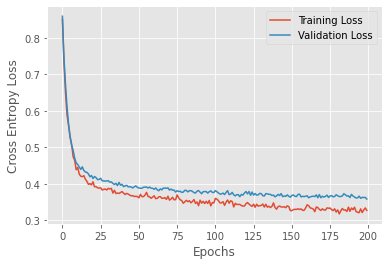

In [40]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

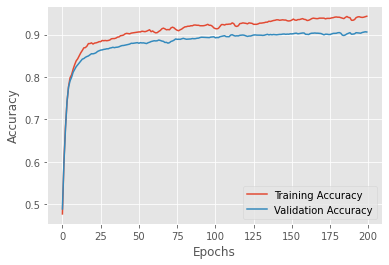

In [41]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix
val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.8977461447212337
-------------------------------------------------------------
Classification Accuracy training set 0.9210084033613445
-------------------------------------------------------------
Confusion Matrix validation set:
[[2193  125]
 [ 306 1591]]
-------------------------------------------------------------
Confusion Matrix training set:
[[969  41]
 [100 675]]


In [43]:
from sklearn.metrics import roc_auc_score

roc_auc_score(val_lab,indices_val)

0.8923834372696002

In [44]:
class GCN(nn.Module):
    def __init__(self, in_feats, hid_feats_1, hid_feats_2, out_feats):
        super().__init__()
        self.conv1 = dglnn.pytorch.conv.GraphConv(
            in_feats=in_feats, out_feats=hid_feats_1)
        
        self.conv2 = dglnn.pytorch.conv.GraphConv(
            in_feats=hid_feats_1, out_feats=out_feats)
        
#        self.conv3 = dglnn.pytorch.conv.GraphConv(
#            in_feats=hid_feats_2, out_feats=out_feats)

    def forward(self, graph, inputs):
        # inputs are features of nodes
        h = self.conv1(graph, inputs)
        h = F.relu(h)
        h = self.conv2(graph, h)
#        h = F.relu(h)
#        h = self.conv3(graph,h)
        h = F.log_softmax(h,dim=1)
        return h

In [50]:
model = GCN(in_feats=n_features, hid_feats_1=100, hid_feats_2=50, out_feats=n_labels)
opt = torch.optim.Adam(model.parameters())
plot_loss_train = []
plot_loss_val = []
valid_acc = []
train_acc = []
dur = []
for epoch in range(150):
    t0 = time.time()
    model.train()
    # forward propagation by using all nodes
    logits = model(G_dgl, node_features)
    # compute loss
    loss_train = F.cross_entropy(logits[train_mask], node_labels[train_mask])
    loss_val = F.cross_entropy(logits[valid_mask], node_labels[valid_mask])
    plot_loss_train.append(loss_train.item())
    plot_loss_val.append(loss_val.item())
    # compute validation accuracy
    acc_val = evaluate(model, G_dgl, node_features, node_labels, valid_mask)
    acc_train = evaluate(model, G_dgl, node_features, node_labels, train_mask)
    valid_acc.append(acc_val)
    train_acc.append(acc_train)
    # backward propagation
    opt.zero_grad()
    loss_train.backward()
    opt.step()
    dur.append(time.time() - t0)
    if epoch % 10 == 0:
        print('Epoch: {}, train loss: {:.4f}, validation loss: {:.4f}, training accuracy: {:.4f}, validation accuracy: {:.4f}, Time: {:.4f}'.format(epoch,loss_train.item(),loss_val.item(),acc_train,acc_val,np.mean(dur)))


Epoch: 0, train loss: 0.6794, validation loss: 0.6803, training accuracy: 0.5658, validation accuracy: 0.5499, Time: 0.4049
Epoch: 10, train loss: 0.6181, validation loss: 0.6195, training accuracy: 0.7709, validation accuracy: 0.7720, Time: 0.4191
Epoch: 20, train loss: 0.5724, validation loss: 0.5743, training accuracy: 0.7703, validation accuracy: 0.7701, Time: 0.3771
Epoch: 30, train loss: 0.5407, validation loss: 0.5430, training accuracy: 0.7686, validation accuracy: 0.7703, Time: 0.3586
Epoch: 40, train loss: 0.5210, validation loss: 0.5237, training accuracy: 0.7675, validation accuracy: 0.7701, Time: 0.3546
Epoch: 50, train loss: 0.5101, validation loss: 0.5133, training accuracy: 0.7686, validation accuracy: 0.7715, Time: 0.3589
Epoch: 60, train loss: 0.5042, validation loss: 0.5081, training accuracy: 0.7692, validation accuracy: 0.7713, Time: 0.3955
Epoch: 70, train loss: 0.5008, validation loss: 0.5051, training accuracy: 0.7720, validation accuracy: 0.7718, Time: 0.4166
E

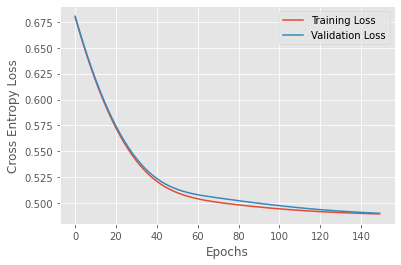

In [51]:
plt.plot(plot_loss_train,label='Training Loss')
plt.plot(plot_loss_val,label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross Entropy Loss')
plt.legend()
plt.show()

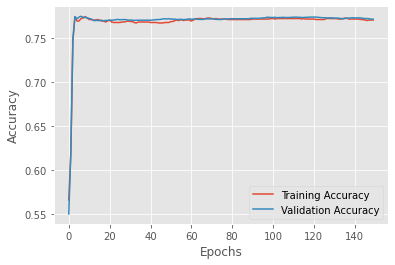

In [52]:
plt.plot(train_acc,label='Training Accuracy')
plt.plot(valid_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [53]:

val_tens = torch.tensor(features)
_, indices_val = torch.max(logits[valid_mask], dim=1)
val_lab = val_tens[valid_mask]
train_lab = val_tens[train_mask]
_, indices_train = torch.max(logits[train_mask], dim=1)

print('Classification Accuracy validation set {}'.format(accuracy_score(val_lab,indices_val)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(train_lab,indices_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(val_lab, indices_val))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(train_lab,indices_train))


Classification Accuracy validation set 0.7712930011862397
-------------------------------------------------------------
Classification Accuracy training set 0.7703081232492998
-------------------------------------------------------------
Confusion Matrix validation set:
[[1778  540]
 [ 424 1473]]
-------------------------------------------------------------
Confusion Matrix training set:
[[764 246]
 [164 611]]


In [54]:
roc_auc_score(val_lab,indices_val)

0.7717648728317679

In [57]:
from sklearn.model_selection import train_test_split
f = pd.get_dummies(features)
x_train, x_test, y_train, y_test = train_test_split(feat,f, test_size = 0.7, shuffle=True)

In [58]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
x_train_tf = tf.convert_to_tensor(x_train)
x_test_tf = tf.convert_to_tensor(x_test)
y_train_tf = tf.convert_to_tensor(y_train)
y_test_tf = tf.convert_to_tensor(y_test)

model = Sequential()

model.add(Dense(15, activation='relu'))
#model.add(Dense(8, activation='relu'))
model.add(Dense(2, activation='softmax'))
#opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x_train_tf, y_train_tf,validation_data=(x_test_tf,y_test_tf), epochs=60, batch_size=5)

Epoch 1/60
360/360 [==============================] - 3s 6ms/step - loss: 0.5816 - accuracy: 0.7161 - val_loss: 0.4076 - val_accuracy: 0.8481
Epoch 2/60
360/360 [==============================] - 2s 6ms/step - loss: 0.3788 - accuracy: 0.8588 - val_loss: 0.3407 - val_accuracy: 0.8719
Epoch 3/60
360/360 [==============================] - 2s 6ms/step - loss: 0.3359 - accuracy: 0.8786 - val_loss: 0.3168 - val_accuracy: 0.8826
Epoch 4/60
360/360 [==============================] - 1s 4ms/step - loss: 0.2972 - accuracy: 0.8913 - val_loss: 0.3003 - val_accuracy: 0.8914
Epoch 5/60
360/360 [==============================] - 1s 4ms/step - loss: 0.2753 - accuracy: 0.9109 - val_loss: 0.2884 - val_accuracy: 0.8964
Epoch 6/60
360/360 [==============================] - 2s 6ms/step - loss: 0.2741 - accuracy: 0.9001 - val_loss: 0.2794 - val_accuracy: 0.8993
Epoch 7/60
360/360 [==============================] - 1s 4ms/step - loss: 0.2615 - accuracy: 0.9001 - val_loss: 0.2714 - val_accuracy: 0.8995
Epoch 

360/360 [==============================] - 2s 5ms/step - loss: 0.1150 - accuracy: 0.9602 - val_loss: 0.2275 - val_accuracy: 0.9102
Epoch 59/60
360/360 [==============================] - 1s 3ms/step - loss: 0.1108 - accuracy: 0.9605 - val_loss: 0.2295 - val_accuracy: 0.9112
Epoch 60/60
360/360 [==============================] - 2s 5ms/step - loss: 0.1121 - accuracy: 0.9578 - val_loss: 0.2316 - val_accuracy: 0.9126


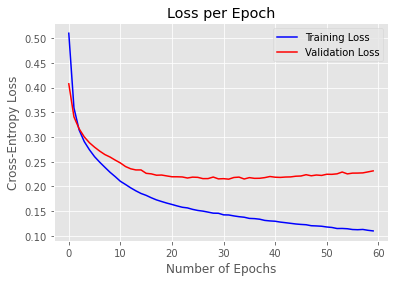

In [59]:
plt.plot(history.history['loss'],label = 'Training Loss', color = 'blue')
plt.plot(history.history['val_loss'],label = 'Validation Loss', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.title('Loss per Epoch')
plt.legend()
plt.show()

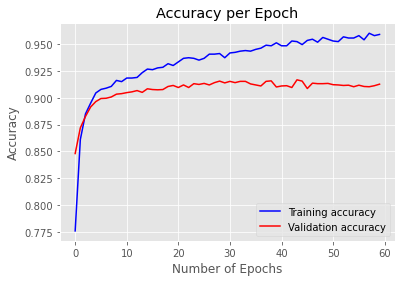

In [60]:
plt.plot(history.history['accuracy'],label = 'Training accuracy', color = 'blue')
plt.plot(history.history['val_accuracy'],label = 'Validation accuracy', color = 'red')
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()
plt.show()

In [70]:
from sklearn import svm

svm_y = np.empty((len(features),1))

for i in range(len(features)):
    if features.iloc[i] == 1:
        svm_y[i] = 1
    else:
        svm_y[i] = -1

svm_y.astype(int)
x_train, x_test, y_train, y_test = train_test_split(feat,svm_y, test_size = 0.6, shuffle=True)


clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

/usr/local/Caskroom/miniconda/base/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9479166666666666
0.9277777777777778


In [62]:
yhat_svm = clf.predict(x_test)
yhat_train_svm = clf.predict(x_train)

print('Classification Accuracy validation set {}'.format(accuracy_score(y_test,yhat_svm)))
print('-------------------------------------------------------------')
print('Classification Accuracy training set {}'.format(accuracy_score(yhat_train_svm,y_train)))
print('-------------------------------------------------------------')
print('Confusion Matrix validation set:')
print(confusion_matrix(y_test,yhat_svm))
print('-------------------------------------------------------------')
print('Confusion Matrix training set:')
print(confusion_matrix(yhat_train_svm,y_train))

Classification Accuracy validation set 0.9222222222222223
-------------------------------------------------------------
Classification Accuracy training set 0.9595833333333333
-------------------------------------------------------------
Confusion Matrix validation set:
[[1920   85]
 [ 195 1400]]
-------------------------------------------------------------
Confusion Matrix training set:
[[1295   69]
 [  28 1008]]


In [63]:
import statsmodels.api as sm

x_train, x_test, y_train, y_test = train_test_split(feat,features, test_size = 0.6, shuffle=True)

log_reg = sm.Logit(y_train, x_train).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.329157
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:           satisfaction   No. Observations:                 2400
Model:                          Logit   Df Residuals:                     2379
Method:                           MLE   Df Model:                           20
Date:                Sat, 15 May 2021   Pseudo R-squ.:                  0.5206
Time:                        15:57:37   Log-Likelihood:                -789.98
converged:                       True   LL-Null:                       -1647.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0899      0.065     -1.385      0.166      -0.217       0.037
1             -0.7593      0.

In [64]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression().fit(x_train, y_train)
print(clf.score(x_test, y_test))
print(clf.score(x_train,y_train))

0.8758333333333334
0.8795833333333334


In [65]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

clf = QDA()
clf.fit(x_train, y_train)
print(clf.score(x_train, y_train))
print(clf.score(x_test, y_test))

0.8733333333333333
0.8686111111111111
